In [ ]:
import geemap
import ee


# Authenticate Earth Engine
ee.Authenticate()
# Initialize Earth Engine
ee.Initialize()

# Create a map
Map = geemap.Map(center=(20.5937, 78.9629), zoom=5)  # Centered on India

# Define coordinates of the polygon (India's general area for example)
coords = [
    [75.0, 22.0],  # Point 1
    [78.0, 22.5],  # Point 2
    [80.0, 24.0],  # Point 3
    [82.0, 25.0],  # Point 4
    [84.0, 24.0],  # Point 5
    [83.0, 23.0],  # Point 6
    [80.0, 22.0],  # Point 7
    [75.0, 22.0]   # Closing the polygon
]

# Create the polygon
polygon = ee.Geometry.Polygon(coords)

# Create a red color style for the polygon
polygon_style = {
    'color': 'FF0000',  # Red color (hex code)
    'fillColor': 'FF0000',  # Solid red fill
    'width': 2  # Border width
}

# Add polygon to the map with the style
Map.addLayer(polygon, polygon_style, "India Polygon")

# Display the map
Map

# second attempt

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import contextily as ctx

# Define updated coordinates for the larger region polygon
coordinates = [
    [87.82049218979007, 24.610189250338866],
    [87.51287500229007, 24.370239632782894],
    [87.42498437729007, 23.969311773294326],
    [87.42498437729007, 23.64766787724495],
    [87.49090234604007, 23.516773178530475],
    [87.89739648666507, 23.4563162740612],
    [87.97430078354007, 23.748267122801842],
    [88.01824609604007, 23.929149911480682],
    [88.00725976791507, 24.07969233077579],
    [88.02923242416507, 24.25009358684182],
    [88.06219140854007, 24.42026685794131],
    [87.93035547104007, 24.520261802302606],
    [87.82049218979007, 24.610189250338866]
]





# Create a shapely Polygon object
polygon = Polygon(coordinates)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame({'geometry': [polygon]}, crs="EPSG:4326")

# Create a plot with India map background
fig, ax = plt.subplots(figsize=(15, 15))  # Larger figure size

# Plot the polygon (with red color and black border)
gdf.plot(ax=ax, facecolor='red', edgecolor='black', linewidth=1)

# Add basemap of India using contextily (CartoDB.Positron style)
# To focus on India, we'll use a more general bounding box
ax.set_xlim(68, 98)  # Longitude bounds of India
ax.set_ylim(6, 37)   # Latitude bounds of India

# Set aspect ratio to be equal for both axes, which prevents distortion
ax.set_aspect('equal')

# Add basemap with CartoDB.Positron
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.CartoDB.Positron)

# Customize the plot
plt.title("Polygon covering ECL Mining Area on India Map")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


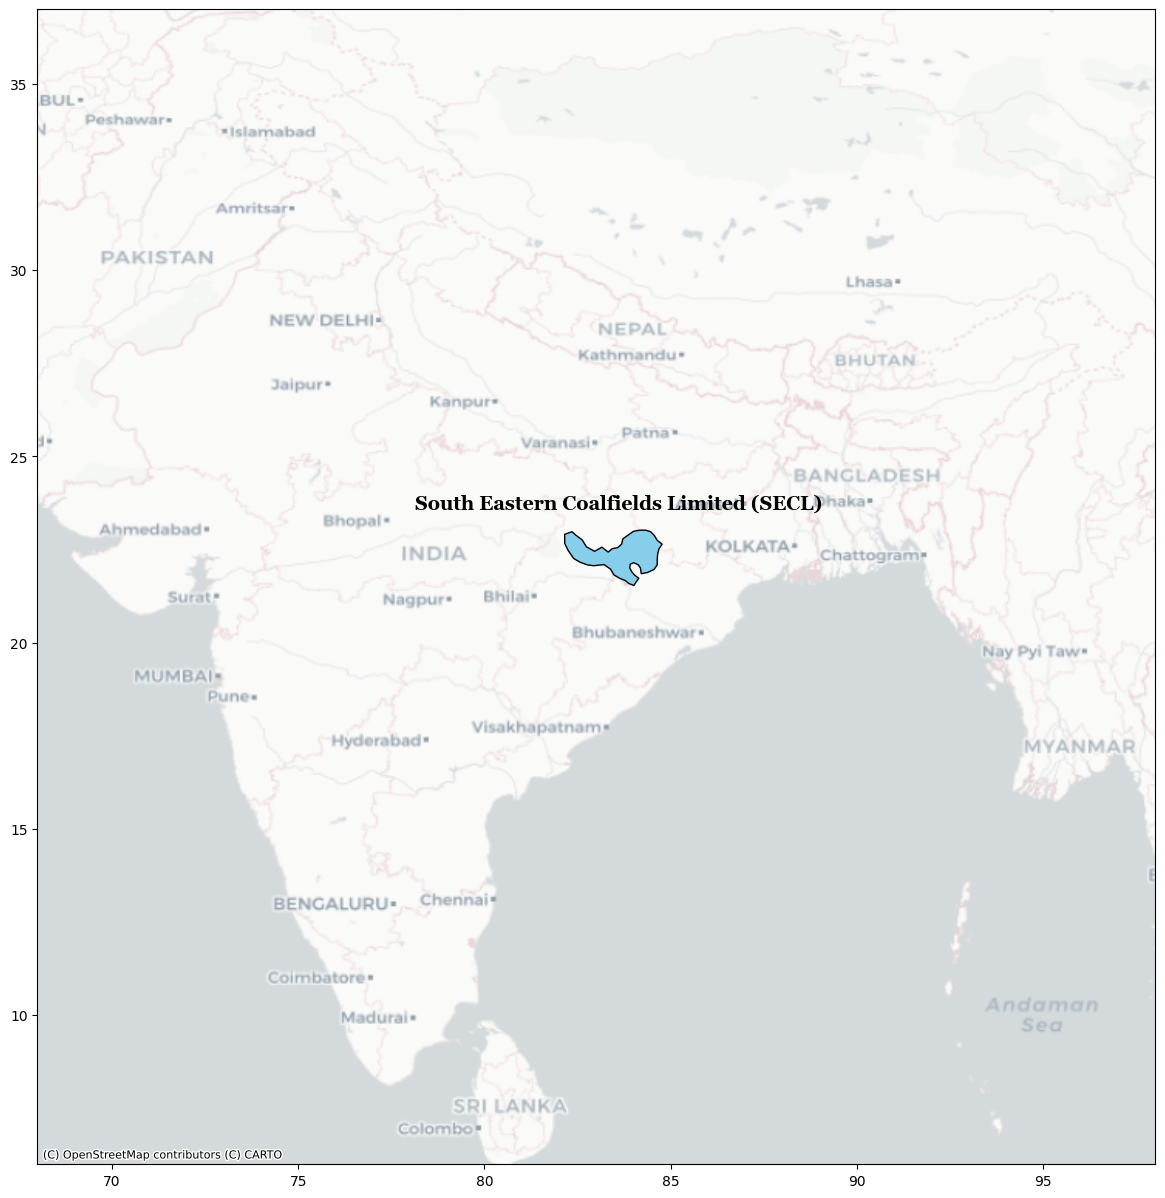

In [125]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import contextily as ctx
import json


with open('mines.json', 'r') as file:
    json_file = json.load(file)

def display(id : str):
    data = json_file["subsidiaries"]

    for idx in data:
        if idx["id"] == id:
            corp = idx
            break

    coords = corp["mines"]
    polygon = Polygon(coords)
    gdf = gpd.GeoDataFrame({'geometry': [polygon]}, crs="EPSG:4326")
    fig, ax = plt.subplots(figsize=(15, 15))
    gdf.plot(ax=ax, facecolor=corp["color"], edgecolor='black', linewidth=1)

    ax.set_xlim(68, 98)  
    ax.set_ylim(6, 37)   
    ax.set_aspect('equal')
    
    ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.CartoDB.Positron)

    centroid = polygon.centroid

    ax.text(
        centroid.x, centroid.y + 1.2,  # Position the text at the centroid
        corp["name"],         # The text you want to display
        fontsize=14,             # Font size
        ha='center',             # Horizontal alignment
        color='black',            # Text color
        weight='bold',           # Font weight
        fontname='Georgia'         #font name
    )

    # plt.title("Polygon covering ECL Mining Area on India Map")
    # plt.xlabel("Longitude")
    # plt.ylabel("Latitude")
    #plt.grid(True)
    plt.savefig("graphs/region.png",bbox_inches='tight', pad_inches=0)
    plt.show()
    
       

display("SECL")


2024 Statistics for Western Coalfields Limited (WCL)
Total coal produced: 56.82 Million tons
Number of mines: 85
Total CO2 emissions: 137504.40 kg
Per capita emission: 4.21 kg/person
Reduced CO2 emissions (after reduction): 110003.52 kg
Carbon credits earned: 27500.88 kg
Carbon offset (equivalent to 1/22 of total emissions): 6250 Trees


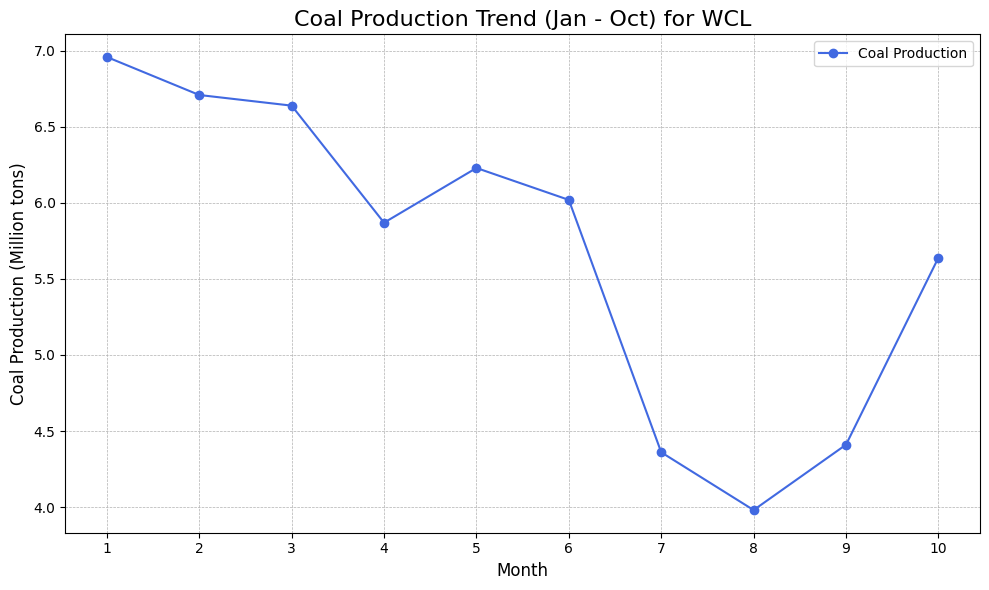

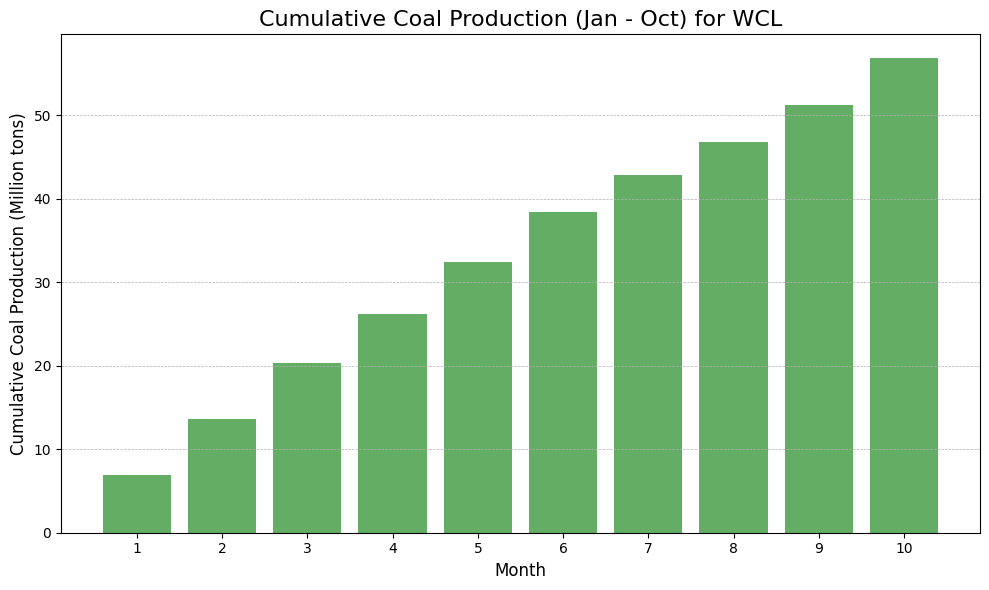

{'Total coal produced': '56.82 Million tons',
 'Number of mines': '85',
 'Total CO2 emissions': '137504.40 kg',
 'Per capita emission': '4.21 kg/person',
 'Reduced CO2 emissions': '110003.52 kg',
 'Carbon credits earned': '27500.88',
 'Carbon offset': '6250 Trees'}

In [194]:
import pandas as pd

df = pd.read_csv('coal_data.csv').tail(10)
with open('mines.json', 'r') as file:
    json_file = json.load(file)

EMISSION_FACTOR = 2.42
def analysis(id,reduction):
    data = json_file["subsidiaries"]

    for idx in data:
        if idx["id"] == id:
            corp = idx
            break

    total_coal = sum(df[id])
    number_of_mines = corp["count"]
    total_emission = total_coal * EMISSION_FACTOR * 1000
    per_capita_emission = total_emission/corp["manpower"]
    reduced_emission = total_emission * (1 - reduction)
    carbon_credits = (total_emission - reduced_emission)
    carbon_offset = int(total_emission / 22)

    print(f"2024 Statistics for {corp["name"]}")
    print(f"Total coal produced: {total_coal:.2f} Million tons")
    print(f"Number of mines: {number_of_mines}")
    print(f"Total CO2 emissions: {total_emission:.2f} kg")
    print(f"Per capita emission: {per_capita_emission:.2f} kg/person")
    print(f"Reduced CO2 emissions (after reduction): {reduced_emission:.2f} kg")
    print(f"Carbon credits earned: {carbon_credits:.2f} kg")
    print(f"Carbon offset (equivalent to 1/22 of total emissions): {carbon_offset} Trees")

    stats = {
                "Total coal produced": f"{total_coal:.2f} Million tons",
                "Number of mines": f"{number_of_mines}",
                "Total CO2 emissions": f"{total_emission:.2f} kg",
                "Per capita emission": f"{per_capita_emission:.2f} kg/person",
                "Reduced CO2 emissions": f"{reduced_emission:.2f} kg",
                "Carbon credits earned": f"{carbon_credits:.2f}",
                "Carbon offset": f"{carbon_offset} Trees",
                }
    
    months = [i for i in range(1,11)]  # This will be the row index (each row represents a month)
    monthly_production = df[id]  # Coal production data for the selected subsidiary

    # Plot the monthly coal production
    plt.figure(figsize=(10, 6))
    plt.plot(months, monthly_production, marker='o', linestyle='-', color='royalblue', label='Coal Production')
    plt.title(f"Coal Production Trend (Jan - Oct) for {id}", fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Coal Production (Million tons)', fontsize=12)
    plt.xticks(months)  # This will display the month numbers as x-axis labels
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.tight_layout()
    plt.savefig('graphs/line-dist.png',bbox_inches='tight', pad_inches=0)
    plt.show()  # Display the plot

    # Plotting the cumulative coal production
    cumulative_production = monthly_production.cumsum()  # Cumulative sum of coal production

    # Plot the cumulative production bar graph
    plt.figure(figsize=(10, 6))
    plt.bar(months, cumulative_production, color='forestgreen', alpha=0.7)
    plt.title(f"Cumulative Coal Production (Jan - Oct) for {id}", fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Cumulative Coal Production (Million tons)', fontsize=12)
    plt.xticks(months)  # Display month numbers
    plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.savefig('graphs/bar-cum.png',bbox_inches='tight', pad_inches=0)
    plt.show()

    return stats



analysis("WCL",0.2)



    



In [ ]:
import google.generativeai as genai

api_key = "" #Add api key here
genai.configure(api_key=api_key)



def promptgen(text,file = None):
    model = genai.GenerativeModel("gemini-1.5-flash")
    if file is not None:
        sample_pdf = genai.upload_file(file)
        response = model.generate_content([text, sample_pdf])
    else:
        response = model.generate_content([text])
    print(response.text)
    return response.text

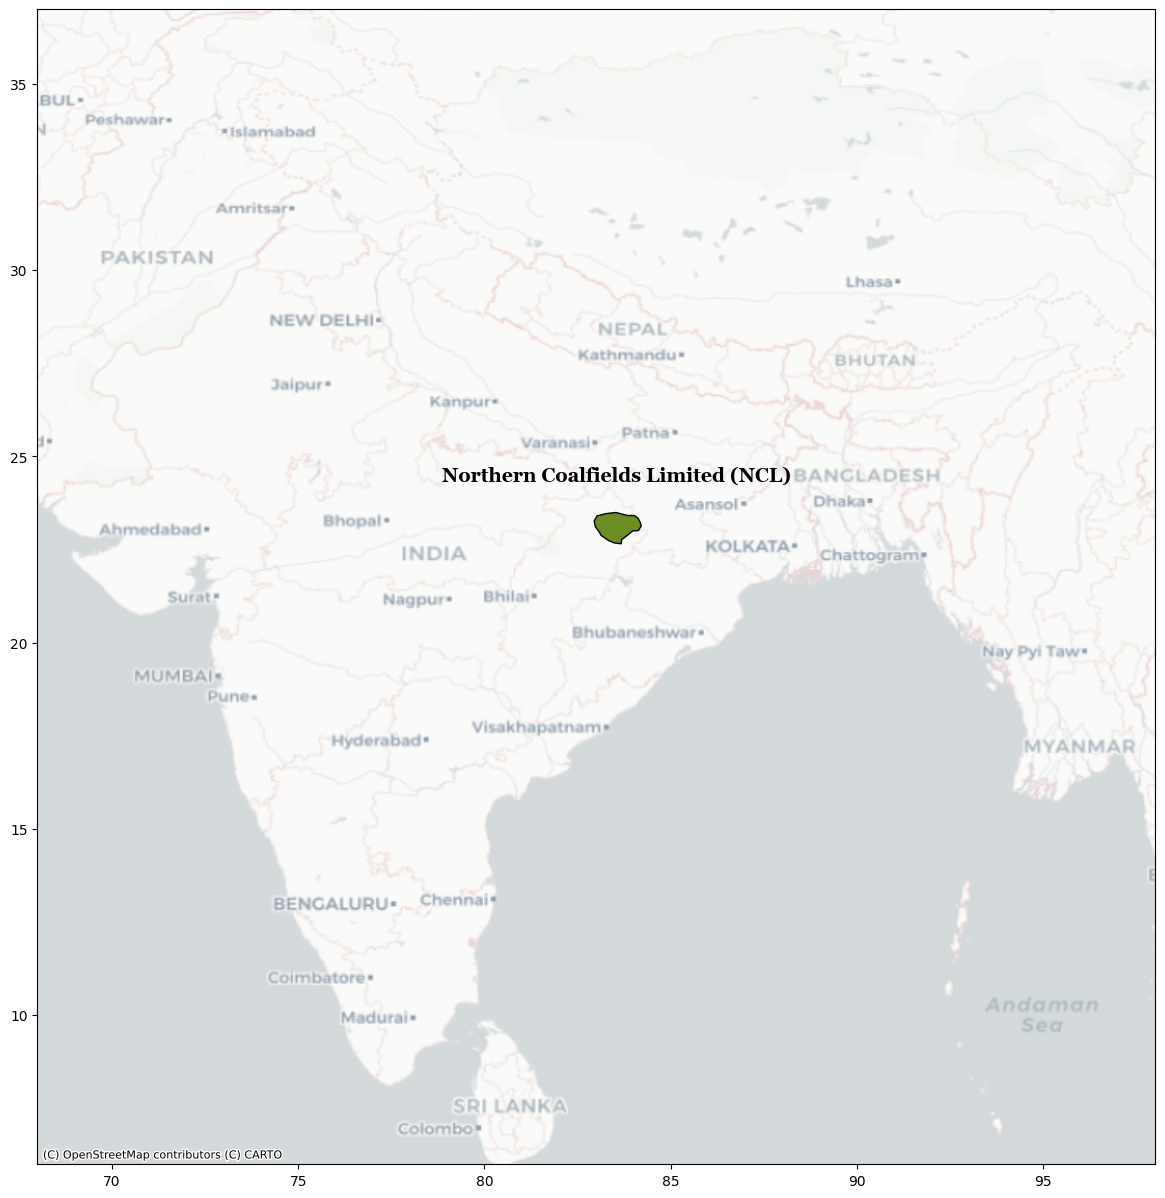

2024 Statistics for Northern Coalfields Limited (NCL)
Total coal produced: 110.44 Million tons
Number of mines: 10
Total CO2 emissions: 267264.80 kg
Per capita emission: 19.69 kg/person
Reduced CO2 emissions (after reduction): 213811.84 kg
Carbon credits earned: 53452.96 kg
Carbon offset (equivalent to 1/22 of total emissions): 12148 Trees


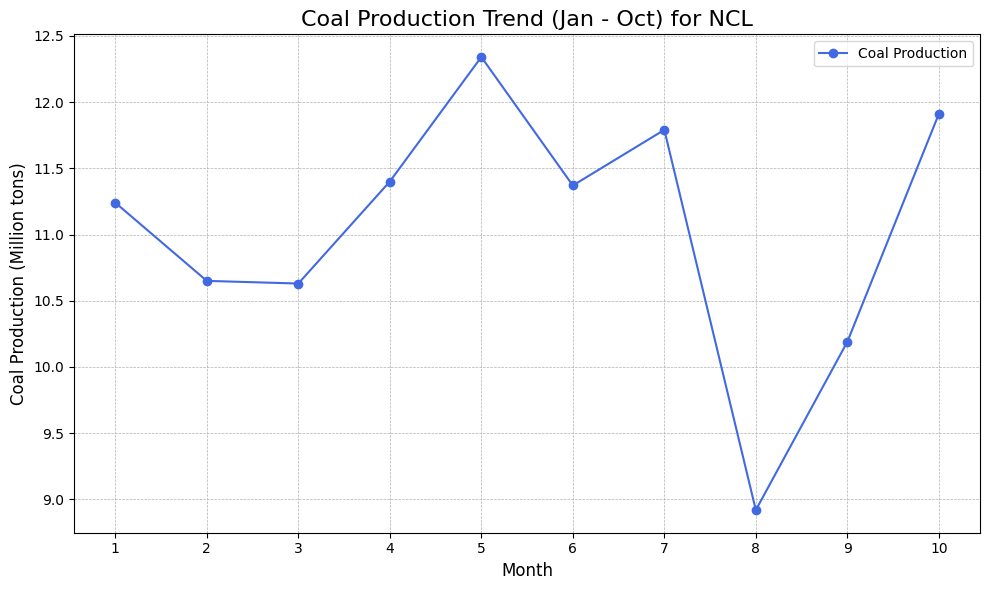

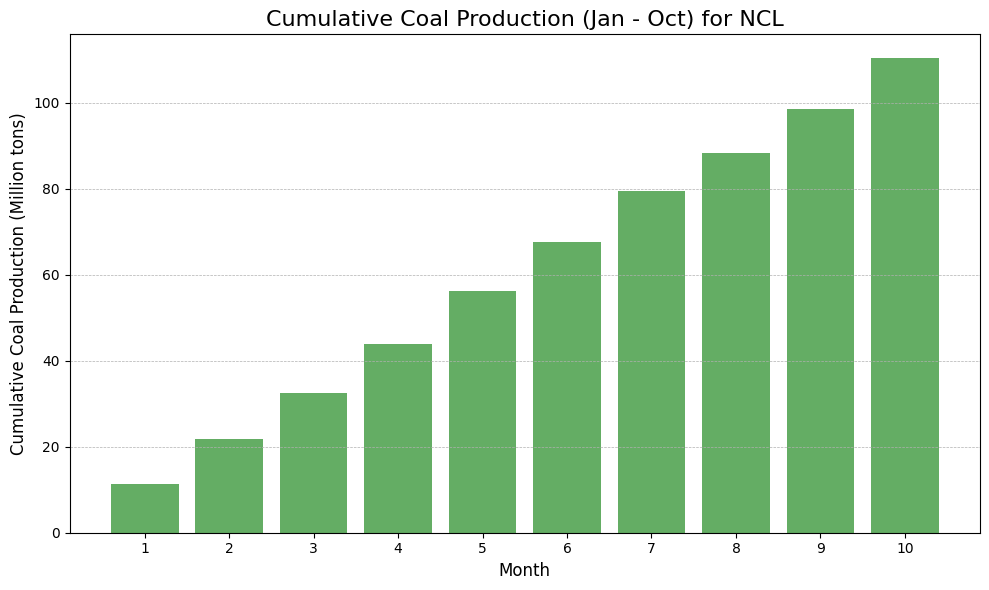

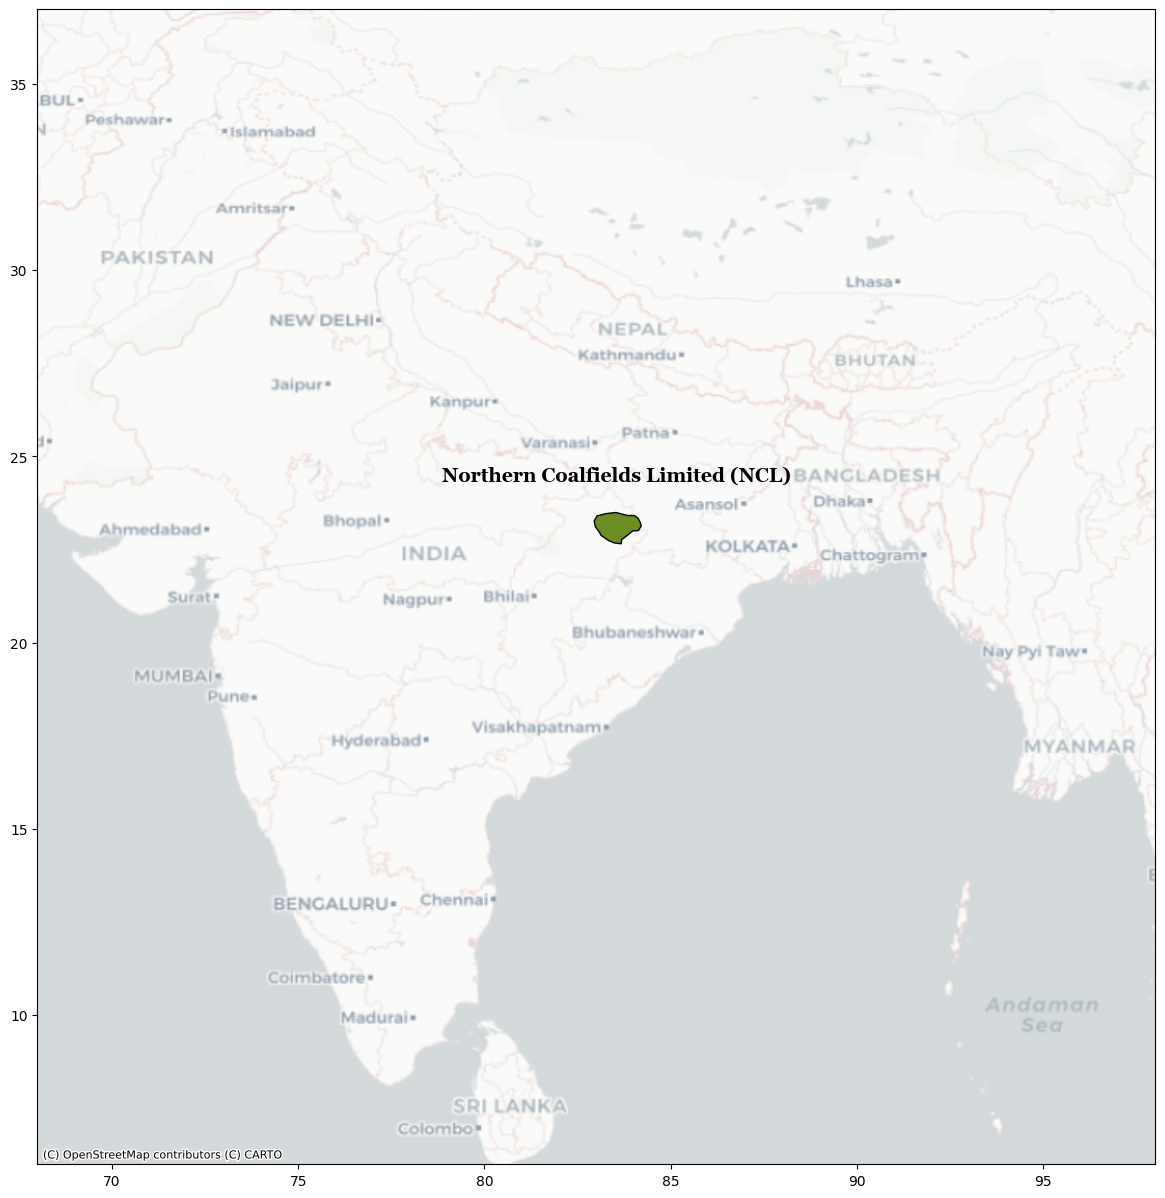

2024 Statistics for Northern Coalfields Limited (NCL)
Total coal produced: 110.44 Million tons
Number of mines: 10
Total CO2 emissions: 267264.80 kg
Per capita emission: 19.69 kg/person
Reduced CO2 emissions (after reduction): 106905.92 kg
Carbon credits earned: 160358.88 kg
Carbon offset (equivalent to 1/22 of total emissions): 12148 Trees


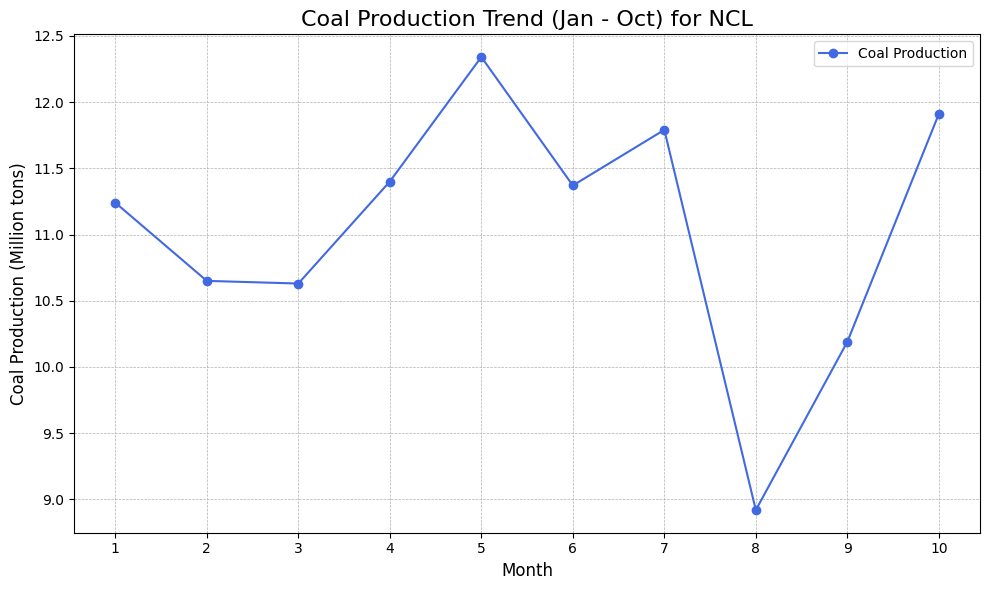

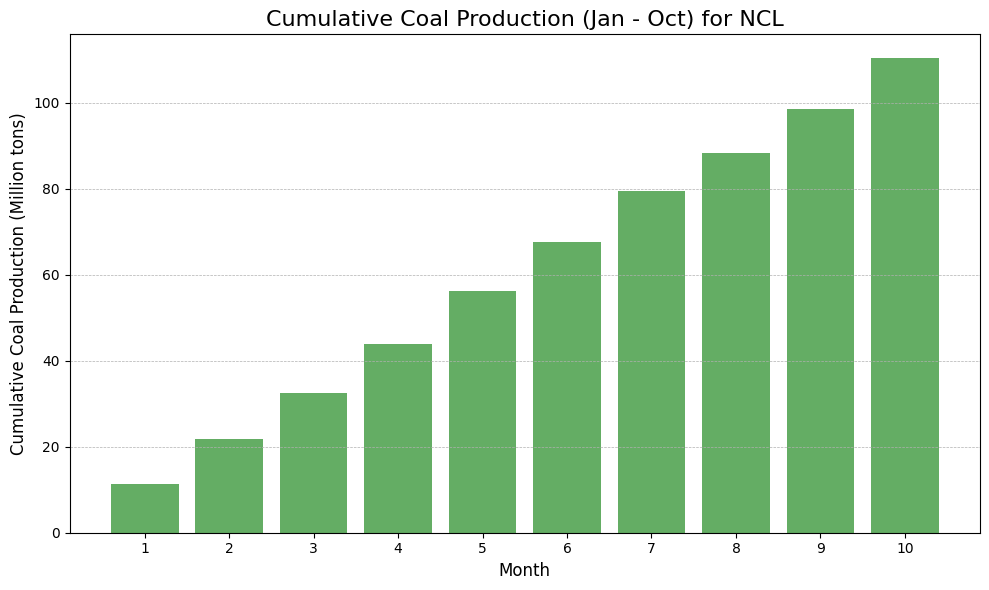

This report analyzes the petroleum product consumption trends of Coal India Limited (CIL) from 2000 to 2023.  The analysis focuses on identifying key patterns and fluctuations in consumption over time, providing insights into CIL's operational dynamics.  The data reveals significant variations in petroleum product usage.


The graph illustrates the consumption of petroleum products by CIL, distinguishing between revised and provisional data for production (PRD) and dispatch (DES).  From 2000 to 2010, consumption remained relatively stable, fluctuating between 20,000 and 30,000 tonnes. A notable increase is observed from 2010 onwards, with consumption reaching its peak around 2020.  The revised data consistently shows slightly higher consumption than the provisional data, indicating a general upward trend.  Fluctuations throughout the period likely reflect seasonal variations and operational changes within CIL. The differences between revised and provisional data suggest ongoing refinem

In [195]:
from fpdf import FPDF
id = "NCL"
class PDF(FPDF):
    def header(self):
        self.image("assets/image.png", x=10, y=8, w=30)
        self.set_font("Times", style="B", size=28)
        self.set_draw_color(0, 80, 180)
        self.set_fill_color(20, 20, 20)
        self.set_text_color(50, 50, 50)
        self.ln(20)
        self.cell(10)
        self.cell(0, 10, 'COAL MINE ANALYSIS REPORT', 0, 1, 'C')
        self.ln(10)
        self.set_line_width(0.5)
        self.line(10, self.get_y(), 200, self.get_y())
        self.ln(10)
        

    def footer(self):
        # Add a footer with page numbers
        self.set_y(-15)  # Position at 1.5 cm from the bottom
        self.set_font("Arial", size=10)
        self.cell(0, 10, f"Page {self.page_no()}", align="C")

    def add_page_template(self):
        # Optional: Add a watermark or design for each page
        self.set_font("Arial", size=8)
        self.set_text_color(0, 0, 0)
        self.set_y(50)
        self.cell(0, 10, "Confidential Report", align="C")
        self.ln(5)

display(id)
stats = analysis(id,0.2)
df = pd.read_csv('coal_data.csv').tail(10)
with open('mines.json', 'r') as file:
    json_file = json.load(file)


def generate_report(id,reduction_rate):
    df = pd.read_csv('coal_data.csv').tail(10)
    with open('mines.json', 'r') as file:
        json_file = json.load(file)
    display(id)
    stats = analysis(id,reduction_rate)
    data = json_file["subsidiaries"]

    for idx in data:
        if idx["id"] == id:
            corp = idx
            break
    pdf = PDF()

    #Page 1 Introduction
    pdf.add_page()
    pdf.add_page_template()  # Add custom elements to the template
    pdf.set_font("Helvetica", size=12)

    pdf.set_font("Times", style="B", size=14)
    pdf.cell(0, 10, "1. Introduction", ln=True, align="L")
    pdf.ln(5)

    pdf.ln(5)  # Add space
    pdf.image("graphs/coal-prod.png", x=40, y=70, w=140)  # Adjust position and size as needed

    # Add the introductory paragraph
    pdf.ln(80)  # Add vertical spacing to position the paragraph below the image
    pdf.set_font("Helvetica", size=12)
    promptintro = f"write 3 lines introducing a report analysing the coal trends of {id}. also provide a second paragraph with 7 lines explaining the graph along with detailed insights."
    intro_paragraph = (
    promptgen(promptintro,"graphs/coal-prod.png")
    )
    pdf.multi_cell(0, 7, intro_paragraph)

    #Page 2 
    pdf.add_page()
    pdf.add_page_template()
    pdf.set_font("Times", style="B", size=14)
    pdf.cell(0, 10, "2. Coal Production", ln=True, align="L")
    pdf.ln(5)
    pdf.image("graphs/line-dist.png", x=10, y=70, w=90)
    pdf.image("graphs/bar-cum.png", x=110, y=70, w=90)

    pdf.ln(60)  # Add vertical spacing to position the paragraph below the image
    pdf.set_font("Helvetica",style = 'B' ,size=12)
    pdf.cell(0, 10, f"Total Coal Production of {id} in 2024: " + stats["Total coal produced"], ln=True)
    pdf.cell(0, 10, f"Number of Mines in {id}: " + stats["Number of mines"], ln=True)
    pdf.ln(5)
    pdf.set_font("Helvetica" ,size=12)
    promptcoal = f"Describe {corp["name"]} and its role in coal industry. talk about its establishment what are its average productions. Regions that {corp["name"]} is distributed too and analysis of monthly production. All in plain text no bold text. Be more definitive with your language. Write in 20 lines and 2 paragraphs"
    intro_paragraph = (
    promptgen(promptcoal)
    )
    pdf.multi_cell(0, 7, intro_paragraph)

    pdf.add_page()
    pdf.add_page_template()
    pdf.set_font("Times", style="B", size=14)
    pdf.cell(0, 10, "3. Coal Production", ln=True, align="L")
    pdf.ln(5)
    pdf.image("graphs/region.png", x=60, y=65, w=80)

    pdf.ln(80)  # Add vertical spacing to position the paragraph below the image
    pdf.set_font("Helvetica",style = 'B' ,size=12)
    pdf.cell(0, 10, f"Carbon Credits {id} earned in 2024: " + stats["Carbon credits earned"], ln=True)
    pdf.cell(0, 10, f"Carbon offset {id} in 2024: " + stats["Carbon offset"], ln=True)
    pdf.ln(5)
    pdf.set_font("Helvetica" ,size=12)
    promptcarbon = f"i have calculated the carbon credits: " +stats["Carbon credits earned"] + " and number of trees needed to offset the carbon emitted: " + stats["Carbon offset"] + ". write 12 lines describing this and provide in-depth stats and analysis"
    text = promptgen(promptcarbon)
    text = text.replace("’", "'")
    intro_paragraph = (
    text
    )
    pdf.multi_cell(0, 7, intro_paragraph)



    pdf_file = f"coal_analysis.pdf"
    pdf.output(pdf_file)
    print(f"PDF report saved as {pdf_file}")

    


generate_report(id,0.6)